In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Real_Combine.csv')

In [3]:
data.head(5)

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [4]:
#Checking the datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 9 columns):
T         731 non-null float64
TM        731 non-null float64
Tm        731 non-null float64
SLP       731 non-null float64
H         731 non-null float64
VV        731 non-null float64
V         731 non-null float64
VM        731 non-null float64
PM 2.5    730 non-null float64
dtypes: float64(9)
memory usage: 51.5 KB


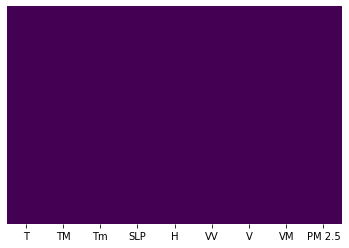

In [5]:
## Check for null values

sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
#Percentage of null values present if any
data.isnull().mean()

T         0.000000
TM        0.000000
Tm        0.000000
SLP       0.000000
H         0.000000
VV        0.000000
V         0.000000
VM        0.000000
PM 2.5    0.001368
dtype: float64

In [7]:
#Dropping the null values as only a small fraction is present
data=data.dropna()

In [8]:
#EDA
data.describe()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,25.572329,32.249726,19.285068,1008.180000,64.097260,1.892329,6.632877,15.702877,107.929150
std,7.279810,6.840215,7.452854,7.556041,15.438985,0.686832,3.969204,7.657372,82.576607
min,6.700000,9.800000,0.000000,991.500000,20.000000,0.300000,0.400000,1.900000,0.000000
25%,18.900000,27.600000,12.025000,1001.300000,55.000000,1.400000,3.500000,11.100000,43.583333
50%,27.700000,34.100000,21.000000,1008.450000,66.000000,1.900000,6.300000,14.800000,81.729167
75%,31.200000,36.900000,25.900000,1015.000000,75.000000,2.400000,9.100000,18.300000,153.934375
max,38.500000,45.500000,32.700000,1023.200000,98.000000,5.800000,24.400000,57.600000,404.500000


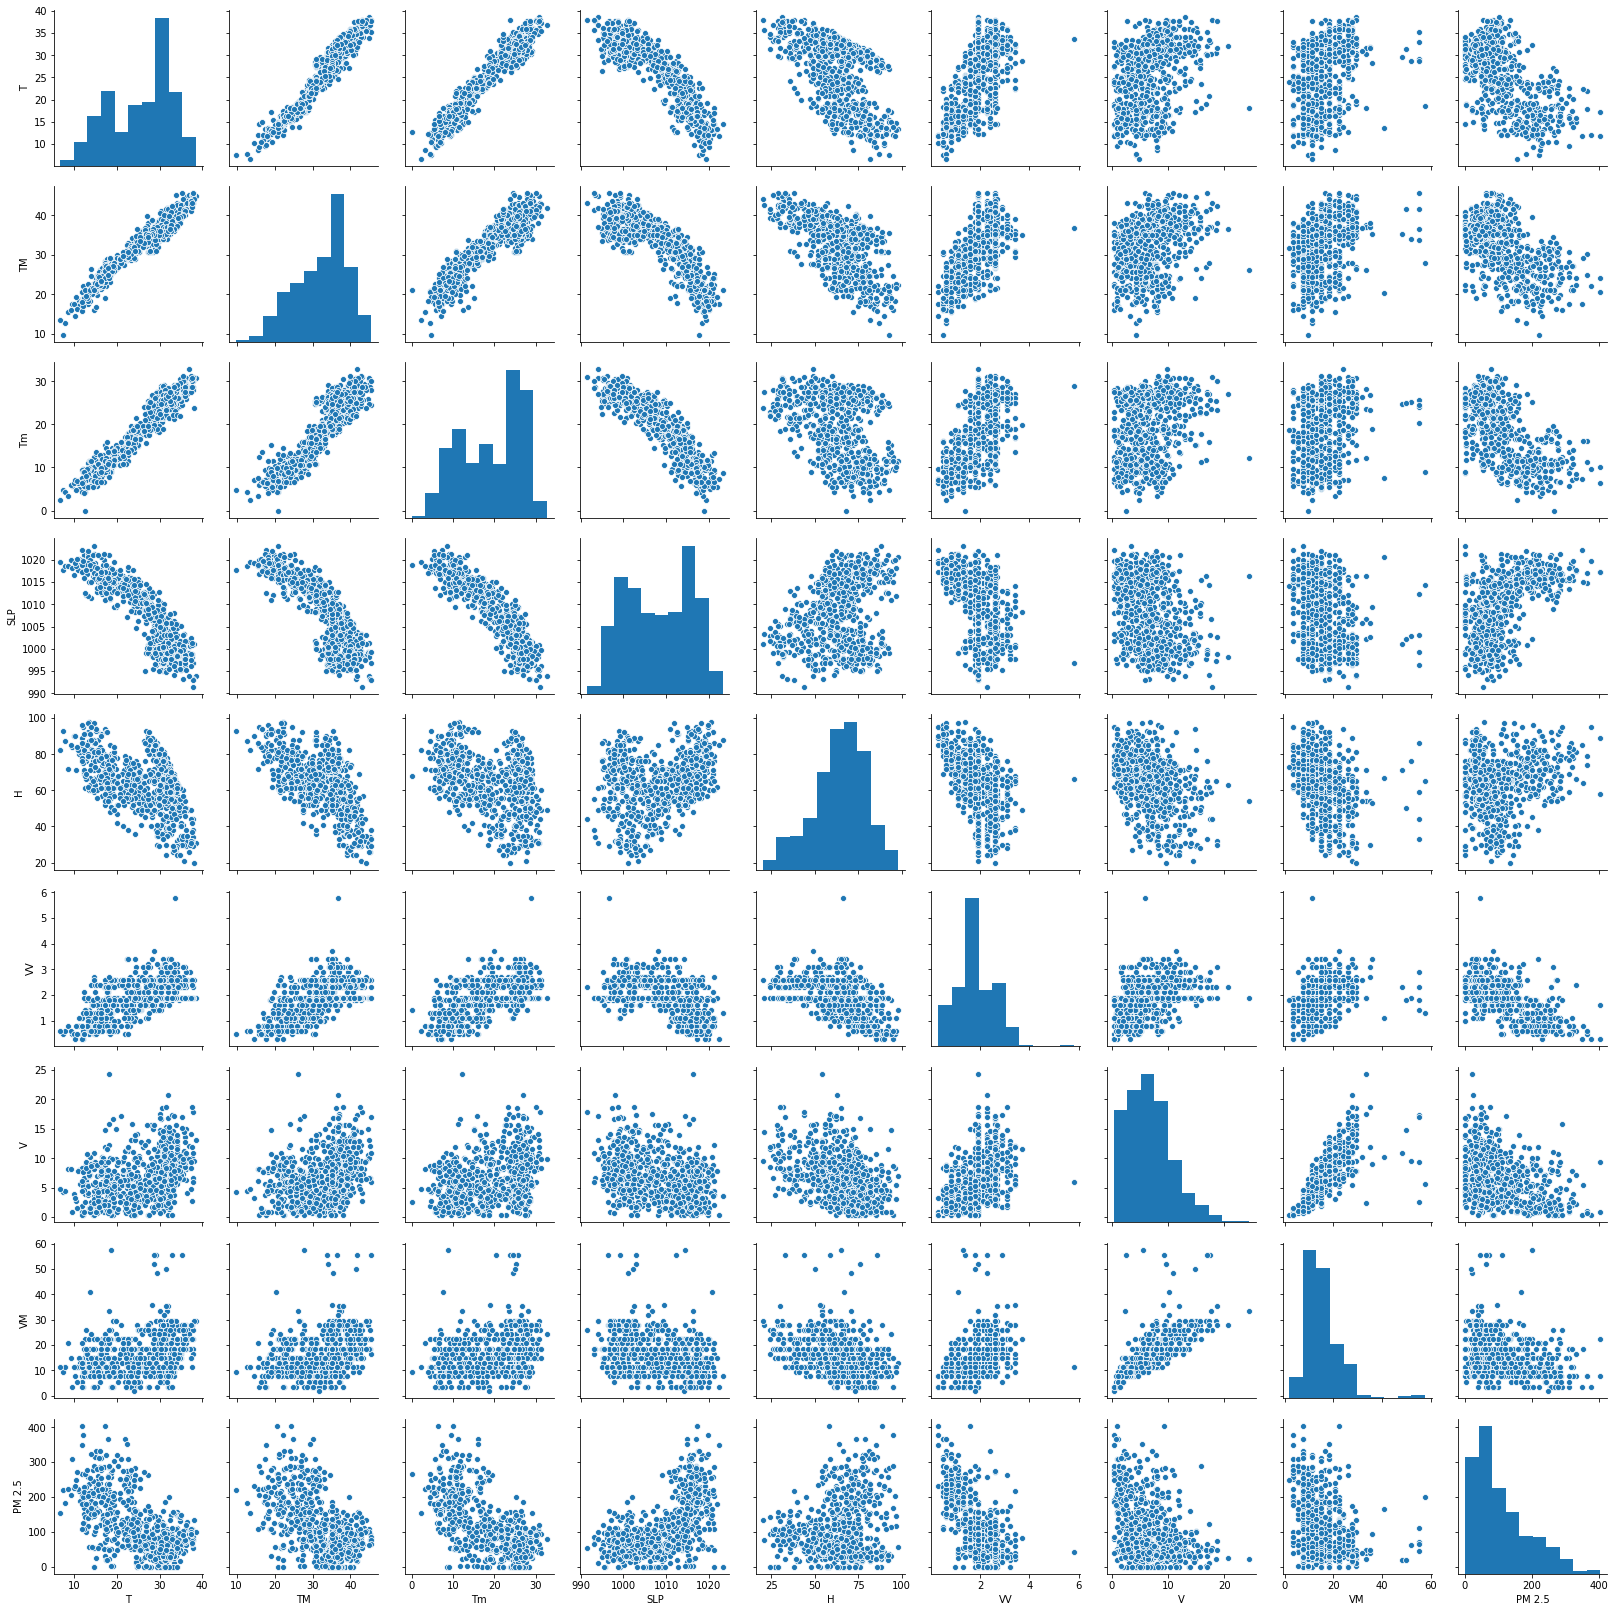

In [9]:
#Multivariate Analysis
sns.pairplot(data)

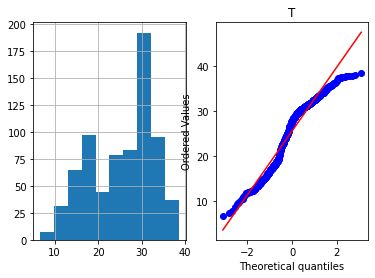

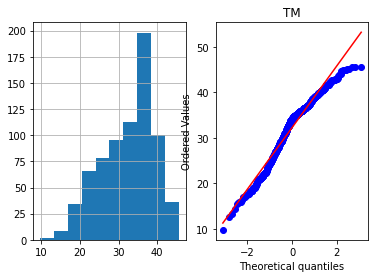

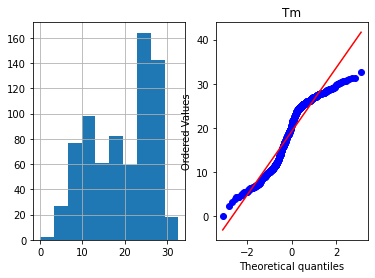

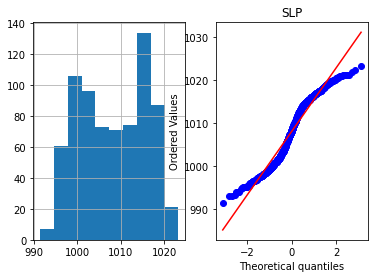

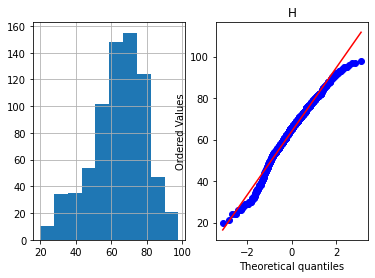

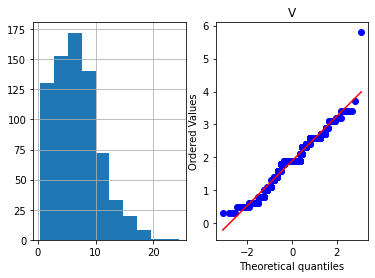

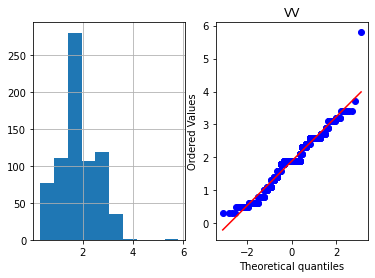

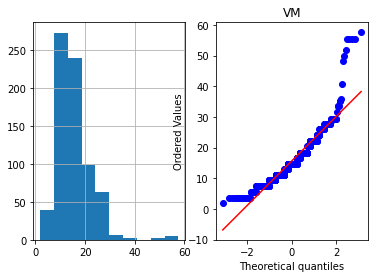

In [10]:
#Checking if the data is Gausian distributed using QQ plot
import scipy.stats as stat
import pylab

plt.subplot(1,2,1)
data['T'].hist()
plt.subplot(1,2,2)
stat.probplot(data['T'],dist='norm',plot=pylab)
plt.title('T')
plt.show()

plt.subplot(1,2,1)
data['TM'].hist()
plt.subplot(1,2,2)
stat.probplot(data['TM'],dist='norm',plot=pylab)
plt.title('TM')
plt.show()

plt.subplot(1,2,1)
data['Tm'].hist()
plt.subplot(1,2,2)
stat.probplot(data['Tm'],dist='norm',plot=pylab)
plt.title('Tm')
plt.show()


plt.subplot(1,2,1)
data['SLP'].hist()
plt.subplot(1,2,2)
stat.probplot(data['SLP'],dist='norm',plot=pylab)
plt.title('SLP')
plt.show()

plt.subplot(1,2,1)
data['H'].hist()
plt.subplot(1,2,2)
stat.probplot(data['H'],dist='norm',plot=pylab)
plt.title('H')
plt.show()

plt.subplot(1,2,1)
data['V'].hist()
plt.subplot(1,2,2)
stat.probplot(data['VV'],dist='norm',plot=pylab)
plt.title('V')
plt.show()

plt.subplot(1,2,1)
data['VV'].hist()
plt.subplot(1,2,2)
stat.probplot(data['VV'],dist='norm',plot=pylab)
plt.title('VV')
plt.show()

plt.subplot(1,2,1)
data['VM'].hist()
plt.subplot(1,2,2)
stat.probplot(data['VM'],dist='norm',plot=pylab)
plt.title('VM')
plt.show()

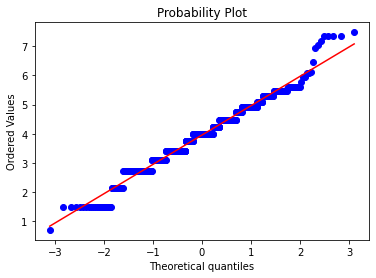

In [11]:
#Doing Boxcox Transform
data['VM'] , _= stat.boxcox(data['VM'])
stat.probplot(data['VM'],dist='norm',plot=pylab)
plt.show()

In [12]:
#Findning the corelation between the variables
data.corr()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.967276,0.958892,-0.884383,-0.518870,0.622637,0.326067,0.303414,-0.628336
TM,0.967276,1.000000,0.896699,-0.829254,-0.599629,0.598479,0.320116,0.311590,-0.569381
Tm,0.958892,0.896699,1.000000,-0.909514,-0.315305,0.560299,0.312904,0.275536,-0.669059
SLP,-0.884383,-0.829254,-0.909514,1.000000,0.274196,-0.491842,-0.346130,-0.325413,0.615615
H,-0.518870,-0.599629,-0.315305,0.274196,1.000000,-0.475279,-0.399079,-0.398183,0.174658
VV,0.622637,0.598479,0.560299,-0.491842,-0.475279,1.000000,0.402884,0.400054,-0.628621
V,0.326067,0.320116,0.312904,-0.346130,-0.399079,0.402884,1.000000,0.806534,-0.354799
VM,0.303414,0.311590,0.275536,-0.325413,-0.398183,0.400054,0.806534,1.000000,-0.328001
PM 2.5,-0.628336,-0.569381,-0.669059,0.615615,0.174658,-0.628621,-0.354799,-0.328001,1.000000


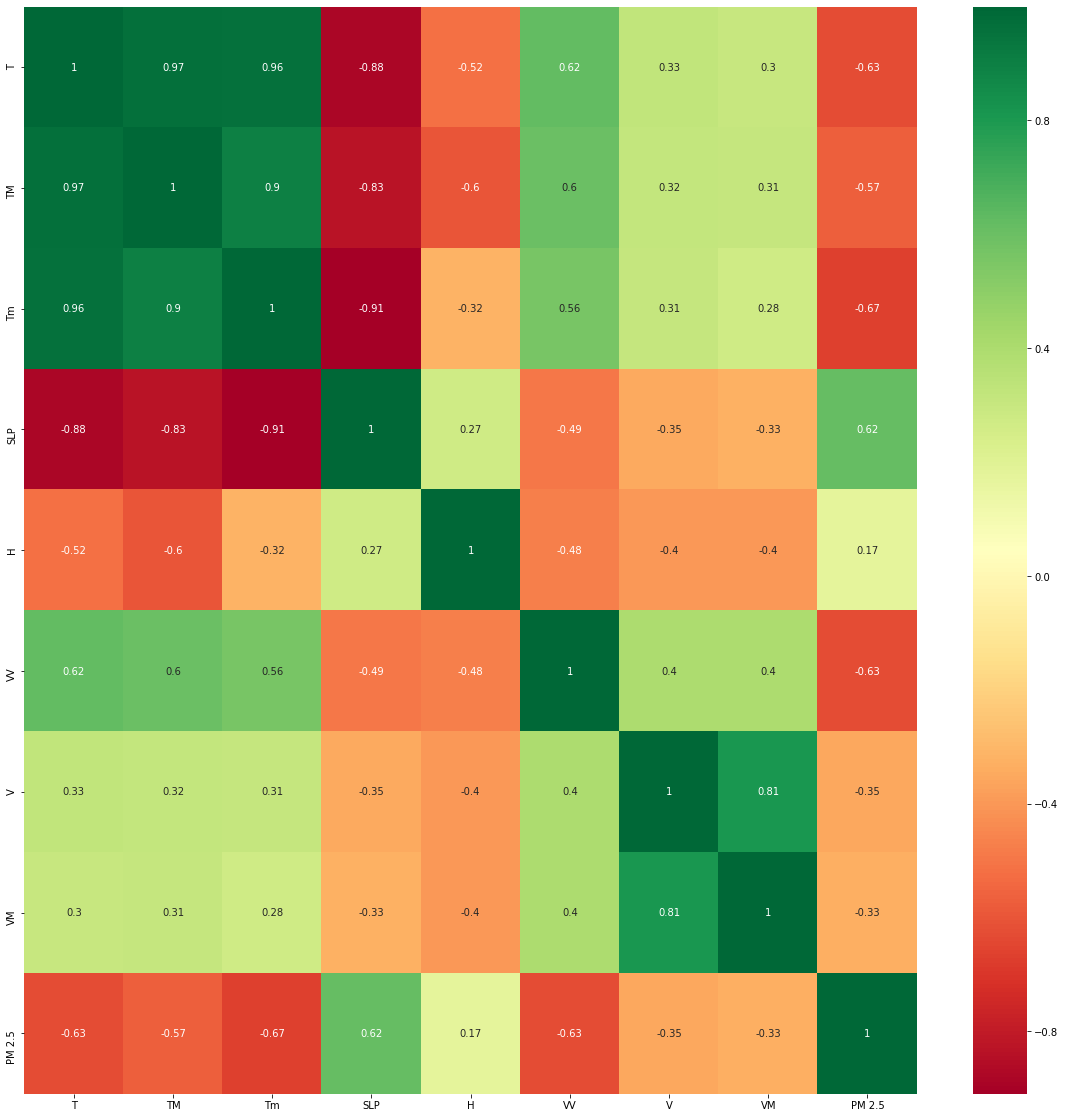

In [13]:
corr= data.corr()
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corr,annot=True,cmap="RdYlGn")

In [14]:
X = data.drop('PM 2.5',axis=1)
y = data['PM 2.5']

In [15]:
#Checking the feature importances
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [16]:
print(model.feature_importances_)

[0.08953906 0.10611188 0.2422594  0.17890313 0.07746544 0.20875744
 0.06199114 0.03497252]


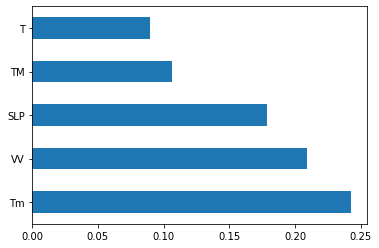

In [17]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [18]:
#Standard Scaler for Scaling the data for faster convergence 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [20]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
regressor.coef_

array([ 17.80477979,   4.8052096 , -56.95652755,   3.20456548,
       -13.06504351, -34.22282618,  -7.76080534,  -4.50502244])

In [22]:
regressor.intercept_

109.57267894451613

In [23]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.60169210856366


In [24]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.5313739868089633


In [25]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5,scoring='neg_mean_squared_error')

In [26]:
score.mean()

-3493.0214995161923

In [27]:
#Checking the model intrepretibility
coeff_data = pd.DataFrame(regressor.coef_,data.columns[:-1],columns=['Coefficient'])
coeff_data

,Coefficient
T,17.804780
TM,4.805210
Tm,-56.956528
SLP,3.204565
H,-13.065044
VV,-34.222826
V,-7.760805
VM,-4.505022


In [28]:
prediction=regressor.predict(X_test)

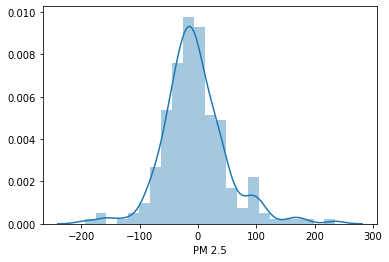

In [29]:
sns.distplot(y_test-prediction)

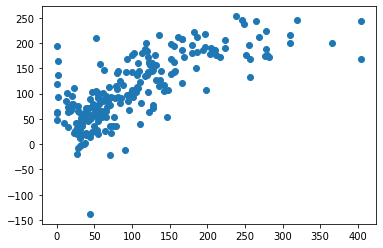

In [30]:
plt.scatter(y_test,prediction)

In [31]:
#Evaluating the model performance
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 40.19949293172157
MSE: 3059.262706943264
RMSE: 55.310602120599484


## Ridge Regression with Hyperparameter Tuning

In [32]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [33]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [34]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 40}
-3394.3486122792083


In [35]:
prediction=ridge_regressor.predict(X_test)

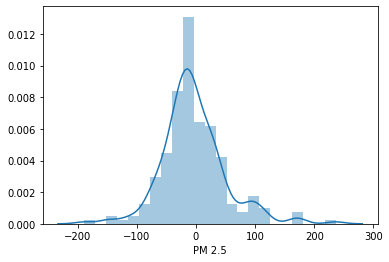

In [36]:
sns.distplot(y_test-prediction)

## Regression Evaluation Metrics


In [37]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 39.519983764101234
MSE: 2984.471481332932
RMSE: 54.630316504052324


## Lasso Regression with Hyperparameter Tuning

In [38]:
from sklearn.linear_model import Lasso

In [39]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [40]:

print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1}
-3419.4784771890686


In [41]:
prediction=lasso_regressor.predict(X_test)

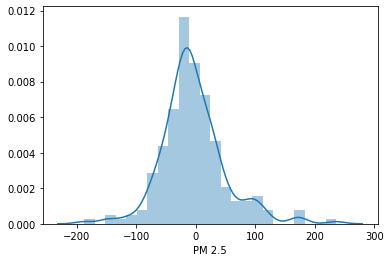

In [42]:
sns.distplot(y_test-prediction)

## Regression Evaluation Metrics

In [43]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 39.4156222262039
MSE: 2968.878564342178
RMSE: 54.487416568802175
